In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(12,6)})
df = pd.read_csv('log.csv',names=['Game','ExplrRt','Score','Moves'])
a = df.loc[df['ExplrRt'] == 1,'Score']
b = df.loc[(df['ExplrRt'] < 1) & (df['ExplrRt'] > .005),'Score']
c = df.loc[df['ExplrRt'] == .005,'Score']

df_stats = pd.DataFrame()
f = open('log.log','r')
for aline in f.readlines():
    values = {}
    for kv in aline.replace(' ','').split(','):
        values[kv.split(':')[0]] = [float(kv.split(':')[1])]
    df_stats = df_stats.append(pd.DataFrame(values),ignore_index=True)
f.close()

df.drop_duplicates(subset=['Game'],keep='last',inplace=True)
df_stats.index.drop_duplicates(keep='last')

RangeIndex(start=0, stop=128555, step=1)

In [3]:
def plot(order=1, column='Score'):
    if df.shape[0] < (order + 2):
        print('Need more observations before plotting')
        return

    ax = sns.lineplot(x='Game',y=column,data=df)
    ax.axvline(df.loc[df['ExplrRt'] < 1,'Game'].min(), color="red", linestyle="--",label='Exploration and Training Begins')
    ax.axvline(df.loc[df['ExplrRt'] == .005,'Game'].min(),color='blue',linestyle='--',label='Exploration Exhausted')
    plt.legend()
    #sns.regplot(x='Game',y=column,data=df,order=order)
    plt.show()
    
def plot_loss():
    ax = sns.scatterplot(x=df_stats.index,y='loss',data=df_stats)
    #sns.regplot(x=df_stats.index,y='loss',ci=None,data=df_stats,lowess=True)
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.show()
    
def plot_accr():
    ax = sns.scatterplot(x=range(df_stats.shape[0]),y='accuracy',data=df_stats)
    #sns.regplot(x=df_stats.index,y='accuracy',ci=None,data=df_stats,lowess=True)
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.show()  
        
def dist():
    sns.distplot(np.log(a+1), color='red', label='Random Games')
    sns.distplot(np.log(b+1), color='skyblue', label='AI Train Games')
    sns.distplot(np.log(c+1), color='grey', label='AI Games')
    plt.xlabel('Score Distributions (logged)')
    plt.legend()
    plt.show()
    
def ttest():
    print('random score mean: {}'.format(a.mean()))
    print('ai train mean: {}'.format(b.mean()))
    print('ai non-random train mean: {}'.format(c.mean()))
    print(ttest_ind(a=np.log(a+1),b=np.log(b+1)))
    print(ttest_ind(a=np.log(a+1),b=np.log(c+1)))

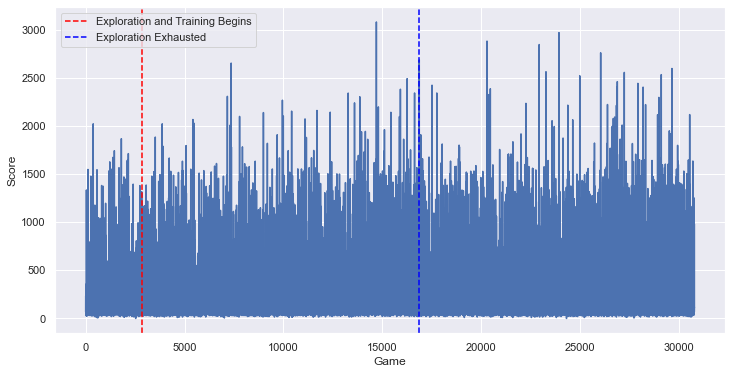

In [4]:
plot()

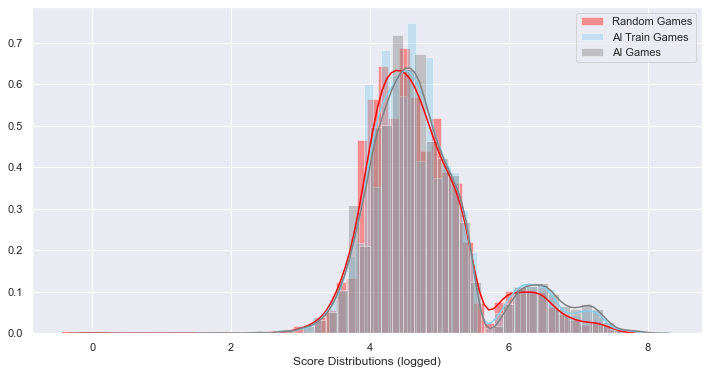

In [5]:
dist()

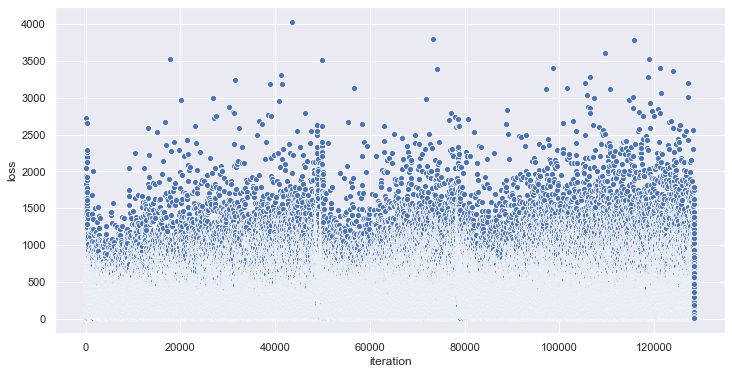

In [6]:
plot_loss()

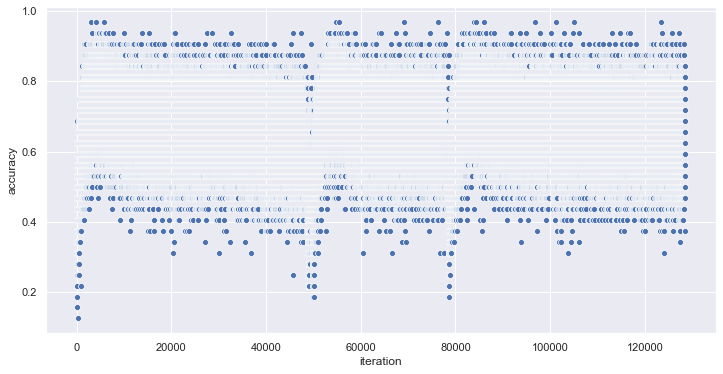

In [7]:
plot_accr()

In [8]:
ttest()

random score mean: 164.47355516637478
ai train mean: 188.473811164714
ai non-random train mean: 199.63831736189402
Ttest_indResult(statistic=-4.085324698489748, pvalue=4.421280329010936e-05)
Ttest_indResult(statistic=-5.133974781085867, pvalue=2.8680683264793876e-07)
